# Task - 01

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler,LabelEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('Dataset.csv')

## EDA

In [3]:
df.drop(["Restaurant ID","Votes", "Country Code","Latitude","Longitude","Restaurant Name","Address","Locality","Locality Verbose"],axis = 1, inplace = True)

In [4]:
pd.set_option('display.max_columns',None)
df.head(1)

,City,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text
0,Makati City,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent


In [5]:
df.tail(1)

,City,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text
9550,��stanbul,Cafe,55,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good


In [6]:
df.shape

(9551, 12)

In [7]:
df.describe()

,Average Cost for two,Price range,Aggregate rating
count,9551.000000,9551.000000,9551.000000
mean,1199.210763,1.804837,2.666370
std,16121.183073,0.905609,1.516378
min,0.000000,1.000000,0.000000
25%,250.000000,1.000000,2.500000
50%,400.000000,2.000000,3.200000
75%,700.000000,2.000000,3.700000
max,800000.000000,4.000000,4.900000


In [8]:
df.describe(include = 'object')

,City,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text
count,9551,9542,9551,9551,9551,9551,9551,9551,9551
unique,141,1825,12,2,2,2,1,6,6
top,New Delhi,North Indian,Indian Rupees(Rs.),No,No,No,No,Orange,Average
freq,5473,936,8652,8393,7100,9517,9551,3737,3737


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  9551 non-null   object 
 1   Cuisines              9542 non-null   object 
 2   Average Cost for two  9551 non-null   int64  
 3   Currency              9551 non-null   object 
 4   Has Table booking     9551 non-null   object 
 5   Has Online delivery   9551 non-null   object 
 6   Is delivering now     9551 non-null   object 
 7   Switch to order menu  9551 non-null   object 
 8   Price range           9551 non-null   int64  
 9   Aggregate rating      9551 non-null   float64
 10  Rating color          9551 non-null   object 
 11  Rating text           9551 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 895.5+ KB


In [10]:
df.isnull().sum()

City                    0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(1987)

## Anomaly Detection

In [12]:
num_cols = ['Average Cost for two','Price range','Aggregate rating']

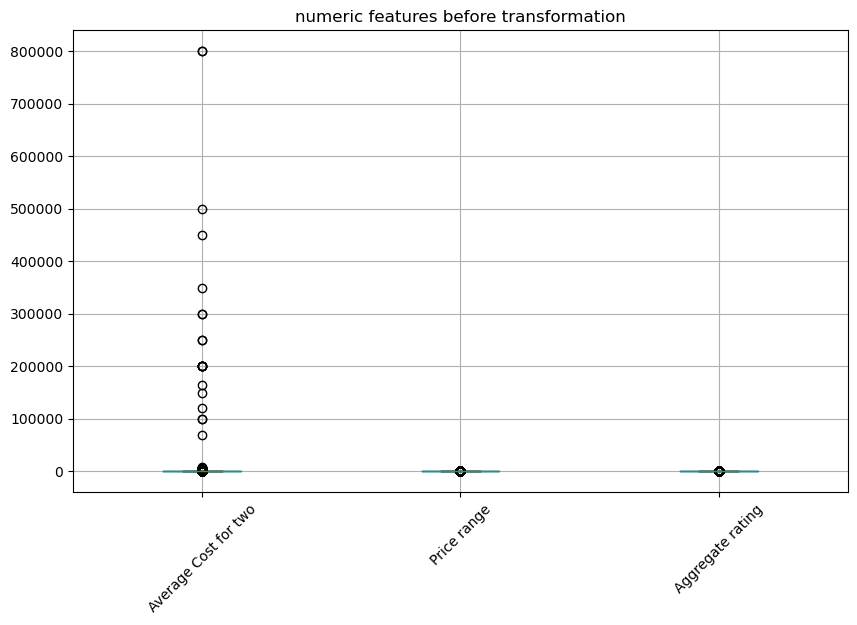

In [13]:
df[num_cols].boxplot(figsize=(10,6))
plt.title('numeric features before transformation')
plt.xticks(rotation=45)
plt.show()

In [14]:
for col in num_cols:
    lb = df[col].quantile(0.25)
    ub = df[col].quantile(0.75)
    df[col] = np.where(
        df[col]>ub,
        ub,
        np.where(
            df[col] < lb,
            lb,
            df[col]
        )
    )

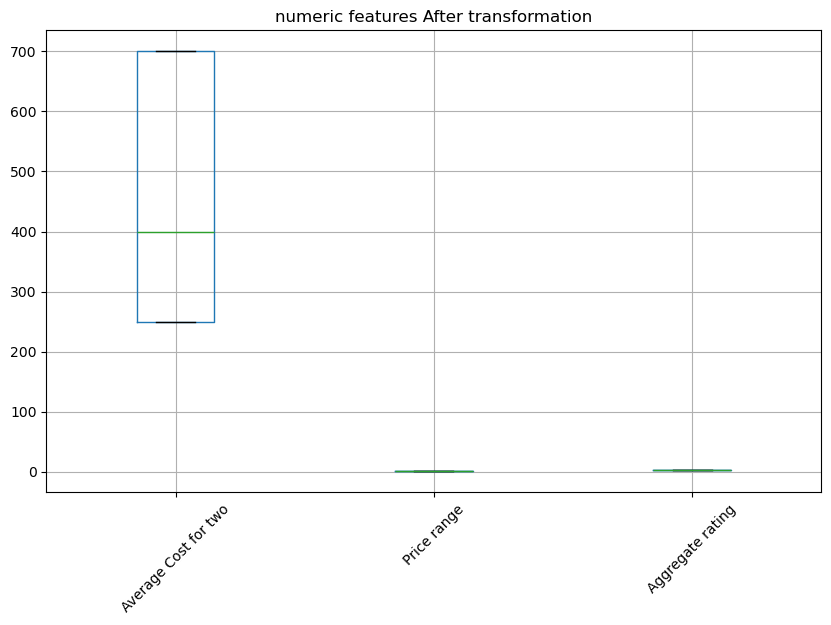

In [15]:
df[num_cols].boxplot(figsize=(10,6))
plt.title('numeric features After transformation')
plt.xticks(rotation=45)
plt.show()

In [16]:
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

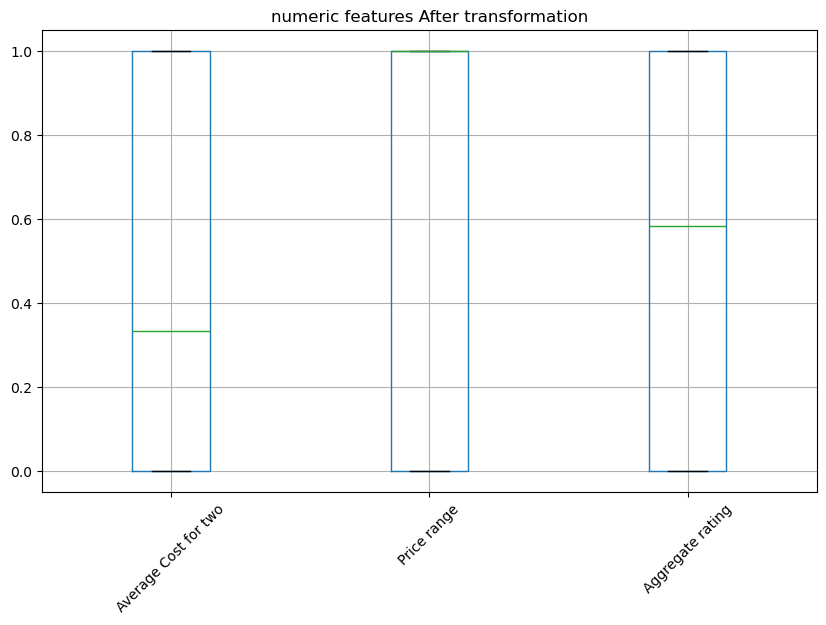

In [17]:
df_scaled[num_cols].boxplot(figsize=(10,6))
plt.title('numeric features After transformation')
plt.xticks(rotation=45)
plt.show()

## Feature Engineering

In [18]:
# df['Cuisines'] = df['Cuisines'].astype(str).apply(lambda x: x.split(',')[0].strip())
# df['Currency'] = df['Currency'].astype(str).apply(lambda x: x.split(',')[0].strip())
df['City'] = df['City'].astype(str).apply(lambda x: x.split(',')[0].strip())

### column transformation

In [19]:
x = df.drop(["Aggregate rating","Cuisines"],axis = 1)

In [20]:
y = df['Aggregate rating']

In [21]:
x.head(1)

,City,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Rating color,Rating text
0,Makati City,700.0,Botswana Pula(P),Yes,No,No,No,2.0,Dark Green,Excellent


In [22]:
y.head()

0    3.7
1    3.7
2    3.7
3    3.7
4    3.7
Name: Aggregate rating, dtype: float64

In [23]:
x_train,x_test,y_train,y_test = tts(x,y,test_size = 0.2,random_state = 42)

In [24]:
x_train.head(1)

,City,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Rating color,Rating text
1115,Faridabad,700.0,Indian Rupees(Rs.),Yes,No,No,No,2.0,Orange,Average


In [25]:
df['Price range'].value_counts()

Price range
2.0    5107
1.0    4444
Name: count, dtype: int64

In [26]:
df['Rating text'].value_counts()

Rating text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64

In [27]:
df['Rating color'].value_counts()

Rating color
Orange        3737
White         2148
Yellow        2100
Green         1079
Dark Green     301
Red            186
Name: count, dtype: int64

In [28]:
# These are binary columns so instead of transforming them using encoder we directly conver it into labels using map function. This is for x_train
# binary_cols = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']
# for col in binary_cols:
#     x_train[col] = x_train[col].map({'Yes':1,'No':0})

In [29]:
# These are binary columns so instead of transforming them using encoder we directly conver it into labels using map function. This is for x_test
# for col in binary_cols:
#     x_test[col] = x_test[col].map({'Yes':1,'No':0})

In [30]:
# without using pipeline

# transformer = ColumnTransformer(transformers = [
#     ('tnf1',OrdinalEncoder(),['Price range', 'Rating text', 'Rating color']),
#     ('tnf2',OneHotEncoder(sparse_output = False, drop = 'first'),['Cuisines', 'Average Cost for two', 'Currency', 'City'])
# ],remainder = 'passthrough')

In [31]:
# print(x_train.columns.tolist())

In [32]:
# transformed_train = transformer.fit_transform(x_train)

In [33]:
# transformed_test = transformer.fit_transform(x_test)

In [34]:
# print(x_test.columns.tolist())

## pipeline

In [35]:
ordinal_pipe = Pipeline([
    ('ordinal_',OrdinalEncoder())
])

onehot_pipe = Pipeline([
    ('onehot_',OneHotEncoder(sparse_output = False,drop = 'first',handle_unknown = 'ignore'))
])

num_pipe = Pipeline([
    ('minmax_',MinMaxScaler())
])

preprocessing = ColumnTransformer([
    ('ordinal',ordinal_pipe,['Price range', 'Rating text', 'Rating color','Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']),
    ('onehot',onehot_pipe,['Currency', 'City']),
    ('num',num_pipe, ['Average Cost for two'])
],remainder = 'passthrough')

In [36]:
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal',
                                 Pipeline(steps=[('ordinal_',
                                                  OrdinalEncoder())]),
                                 ['Price range', 'Rating text', 'Rating color',
                                  'Has Table booking', 'Has Online delivery',
                                  'Is delivering now',
                                  'Switch to order menu']),
                                ('onehot',
                                 Pipeline(steps=[('onehot_',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Currency', 'City']),
                                ('num',
                                 Pipeline(steps=[('minmax_', MinMaxScaler())]),
                                 ['Average Cost for two'])])

In [37]:
pipe = Pipeline([
    ('preprocess',preprocessing),
    ('model',RandomForestRegressor())
])

In [38]:
pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal',
                                                  Pipeline(steps=[('ordinal_',
                                                                   OrdinalEncoder())]),
                                                  ['Price range', 'Rating text',
                                                   'Rating color',
                                                   'Has Table booking',
                                                   'Has Online delivery',
                                                   'Is delivering now',
                                                   'Switch to order menu']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot_',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Currency', 'City']),
                                                 ('num',
                                                  Pipeline(steps=[('minmax_',
                                                                   MinMaxScaler())]),
                                                  ['Average Cost for two'])])),
                ('model', RandomForestRegressor())])

In [39]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal',
                                                  Pipeline(steps=[('ordinal_',
                                                                   OrdinalEncoder())]),
                                                  ['Price range', 'Rating text',
                                                   'Rating color',
                                                   'Has Table booking',
                                                   'Has Online delivery',
                                                   'Is delivering now',
                                                   'Switch to order menu']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot_',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Currency', 'City']),
                                                 ('num',
                                                  Pipeline(steps=[('minmax_',
                                                                   MinMaxScaler())]),
                                                  ['Average Cost for two'])])),
                ('model', RandomForestRegressor())])

In [40]:
x_train_transformed = pipe.named_steps['preprocess'].transform(x_train)

In [41]:
x_train.isnull().sum()

City                    0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Rating color            0
Rating text             0
dtype: int64

In [42]:
if 'Irish' in df['Cuisines'].values:
    print("Yes, 'Irish' exists in City column.")
else:
    print("No, 'Irish' does not exist.")


Yes, 'Irish' exists in City column.


In [43]:
y_pre = pipe.predict(x_test)

In [44]:
from sklearn.metrics import r2_score

In [45]:
score = r2_score(y_test,y_pre)

In [46]:
score

0.8854078792845677